In [77]:
import pandas as pd 
# read the data file.
data = pd.read_csv("admission_data.csv")
# Print first few elements.



print(data.head())

label = data["accepted"].values

print(label[0])

for i in range(100):
    if label[i]:
        label[i] = 0
    else:
        label[i] = 1

data["accepted"] = label 

data.to_csv('admission_data_2.csv')


   test_scores    grades  accepted
0      0.78051 -0.063669         1
1      0.28774  0.291390         1
2      0.85176  0.661200         0
3      0.60436  0.866050         0
4      0.40714  0.178780         1
1


('Total number of records: ', 100)


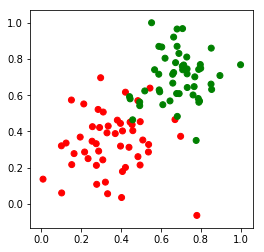

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# extract data frame columns into numpy array.
test_scores = data["test_scores"].values
grades = data["grades"].values
label = data["accepted"].values

# There's a total of 100 student records.
print("Total number of records: ", len(test_scores))

# plot the points.
# The green points indicates the students who are accepted.
# The red ones indicate the ones who are rejected.
colors = ['green','red']

fig = plt.figure(figsize=(4,4))
plt.scatter(test_scores, grades, c=label, cmap=matplotlib.colors.ListedColormap(colors))


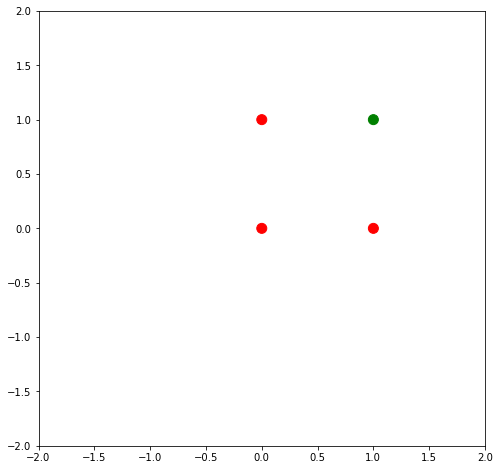

In [48]:
# Plotting the AND gate dataset.
and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])
colors = ['red','green']

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(and_gate_input_0, and_gate_input_1, c=and_gate_output, cmap=matplotlib.colors.ListedColormap(colors), s= 100)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
fig.show()


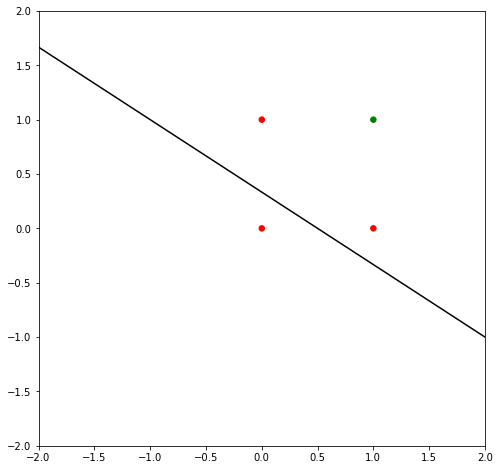

In [61]:
# Setting the values weights and bias.
w1 = 3
w2 = 2
b =  -1

# our line is represented by w1 * x1 + w2 * x2 + b = 0
# To draw the line we need to find the points on the line and join them.
# Given a list of x2 values we can rfind corresponding x1 points using the 
# following derivation.
# x1 = (-1 / w1) ( w2 * x2 +  b )
def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1

def generate_spaced_points(minimum, maximum, total_points):
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)

# Plot the AND gate data and the line.
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.scatter(and_gate_input_0, and_gate_input_1, c=and_gate_output, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')

fig.show()



In [70]:
from collections import OrderedDict


w1 = 3
w2 = 2
b =  -1


def find_output(score):
    """
    The perceptron output is 
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1
    
    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by 
    score = x1 * w1 + x2 * w2 + b
    """
    
    score = x1 * w1 + x2 * w2 + b
    return score 


def find_perceptron_prediction(x1,x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score 
    2. Find the perceptron prediction.
    
    """
    score = find_score(x1,x2)
    prediction = find_output(score)
    return prediction

and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])

# Find the perceptron output for the AND gate dataset using the following parameters, 
# w1 = 3, w2 = 2, b = -1.

prediction = []

# for all 4 samples in the AND dataset find the perceptron prediction.
for i in range(4):
    pred = find_perceptron_prediction(and_gate_input_0[i], and_gate_input_1[i]) 
    prediction.append(pred)
    
df= pd.DataFrame(OrderedDict( ( ('Input 0', pd.Series(and_gate_input_0)), ('Input 1', pd.Series(and_gate_input_1)),
                               ('Actual AND output', pd.Series(and_gate_output)), ('perceptron_prediction', pd.Series(prediction)))))

print(df)

    


   Input 0  Input 1  Actual AND output  perceptron_prediction
0        1        0                  0                      1
1        1        1                  1                      1
2        0        0                  0                      0
3        0        1                  0                      1


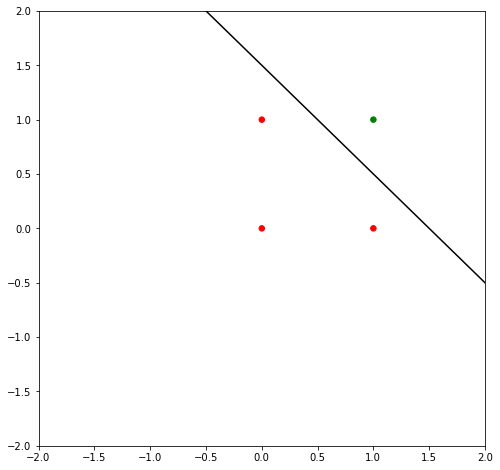

In [71]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Setting the values weights and bias.
# With parameters set to values w1 = 1, w2 = 1 and b = -1.5 the perceptron model 
# is able to separate the 2 classes of data and predict the output correctly too.
w1 = 1
w2 = 1
b =  -1.5

# AND gate inputs
and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])
colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the 
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1

  
def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)

# Plot the AND gate data and the line.
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.scatter(and_gate_input_0, and_gate_input_1, c=and_gate_output, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')

fig.show()


In [72]:
# Setting values for parameters weight1, weight2 and bias.
w1 = 1
w2 = 1
b =  -1.5


def find_output(score):
    """
    The perceptron output is 
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1
    
    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by 
    score = x1 * w1 + x2 * w2 + b
    """
    
    score = x1 * w1 + x2 * w2 + b
    return score 


def find_perceptron_prediction(x1,x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score 
    2. Find the perceptron prediction.
    
    """
    score = find_score(x1,x2)
    prediction = find_output(score)
    return prediction
  

and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])

# Find the perceptron output for the AND gate dataset using the following parameters, 
# w1 = 3, w2 = 2, b = -1.

prediction = []

# for all 4 samples in the AND dataset find the perceptron prediction.
for i in range(4):
    pred = find_perceptron_prediction(and_gate_input_0[i], and_gate_input_1[i]) 
    prediction.append(pred)
    
df= pd.DataFrame(OrderedDict( ( ('Input 0', pd.Series(and_gate_input_0)), ('Input 1', pd.Series(and_gate_input_1)),
                               ('Actual AND output', pd.Series(and_gate_output)), ('perceptron_prediction', pd.Series(prediction)))))

print(df)

   Input 0  Input 1  Actual AND output  perceptron_prediction
0        1        0                  0                      0
1        1        1                  1                      1
2        0        0                  0                      0
3        0        1                  0                      0
